【Data Scaling(데이터 스케일링)】
- 피처(feature)=컬럼(column) 들마다 데이터의 값이 범위가 다 제각각이거나 단위가 다른 경우 데이터를 학습을 할때 0으로 수렴하거나 무한으로 발산할 수 있다.
- 이런 경우 데이터 스켈링을 통해 모든 피처들의 데이터 분포나 범위를 동일하게 조정해 줄 수 있다.

In [1]:
#colab
# 설치후 런타임 다시시작하면 오류가 사라짐
# https://minwook-shin.github.io/python-disk-caching-parallel-computing-using-joblib/
!pip install joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 6.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [1]:
# 특정 출판사에서 제공하는 이미지를 볼 수 있도록 함.
# 단순히 이미지를 볼 수 있도록 제공하는 것으로 중요하진 않다. ㅎ
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=15ee189d3f62a4b0646d73e50646f2666ab36cd42125f69240d4e2c058802162
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [2]:
import mglearn

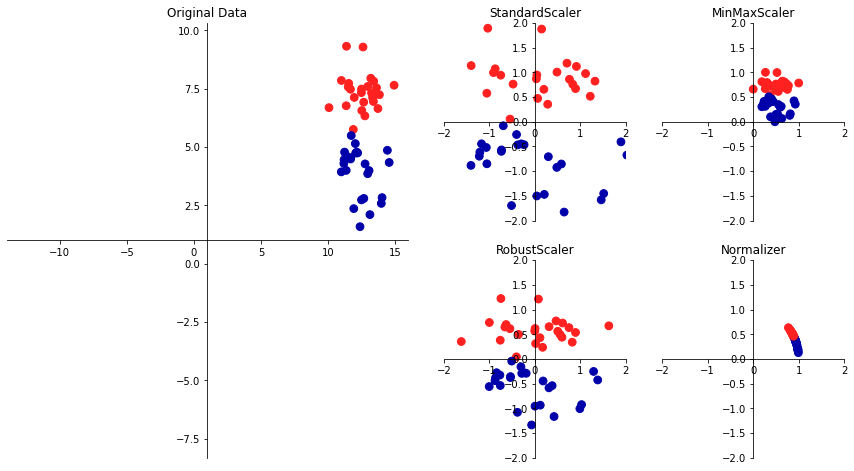

In [3]:
mglearn.plot_scaling.plot_scaling()

# 스케일링
# 표준화 : 표준이 0이고 분산이 1이 되도록 구하는 것
# 정규화 : 특정 어느 범위에 들어가도록 구하는 것. 대표: MinMax.. 구한 값이 0과 1 사이에 구해지도록

# 훈련 데이터와 테스트 데이터를 나눈 후에 일반적인 데이터 전처리 작업을 하게 된다.
# 훈련 데이터와 테스트 데이터의 평균값은 다르다. 훈련데이터에서 구해진 평균값과 테스트 데이터의 평균값을 각각 넣어줘야한다.
# 즉, 훈련 데이터와 테스트 데이터는 서로 독립적이여야 하고, 작업도 나줘서 해야한다.
# 다만 전처리 과정은 동일하게 진행을 해야한다.

# 데이터를 통으로 전처리를 하지말고, 테스트, 훈련 데이터를 나눈후 동일하게 전처리를 한 후에, 독립적으로 진행하면 된다고 하는듯?

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [19]:
# 데이터 분할
iris = load_iris()
iris=pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [20]:
from sklearn.model_selection import train_test_split

# 관측값은 대문자, 훈련은 소문자로 사용한다.
# 관측값_X_훈련, 관측값_X_테스트, 훈련_y_정답, 테스트_y_정답
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2) # 테스트 데이터 분할 비율? 8:2,   7:3
print('X_train:', X_train.shape, '\tX_test:', X_test.shape)
print('Y_train:', y_train.shape, '\tX_test:', y_test.shape)

X_train: (120, 4) 	X_test: (30, 4)
Y_train: (120,) 	X_test: (30,)


In [21]:
# 랜덤값
print(X_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
148                6.2               3.4                5.4               2.3
113                5.7               2.5                5.0               2.0
114                5.8               2.8                5.1               2.4
6                  4.6               3.4                1.4               0.3
72                 6.3               2.5                4.9               1.5


In [22]:
# 랜덤값
print(y_train.head(3))

148    Virginica
113    Virginica
114    Virginica
Name: Class, dtype: object


In [23]:
print(X_test.head(3))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
74                 6.4               2.9                4.3               1.3
123                6.3               2.7                4.9               1.8
108                6.7               2.5                5.8               1.8


In [24]:
print(y_test.head(3))

74     Versicolour
123      Virginica
108      Virginica
Name: Class, dtype: object


In [25]:
# 위의 코드랑 출려값은 같다.

X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2,stratify=iris['Class'])
print('X_train:', X_train.shape, '\tX_test:', X_test.shape)
print('Y_train:', y_train.shape, '\tX_test:', y_test.shape)

X_train: (120, 4) 	X_test: (30, 4)
Y_train: (120,) 	X_test: (30,)


In [26]:
# 데이터 분할 비율이 같아야 한다.
y_train.value_counts()

Setosa         40
Versicolour    40
Virginica      40
Name: Class, dtype: int64

In [27]:
type(y_train)
y_train.head(5)

46          Setosa
63     Versicolour
120      Virginica
8           Setosa
101      Virginica
Name: Class, dtype: object

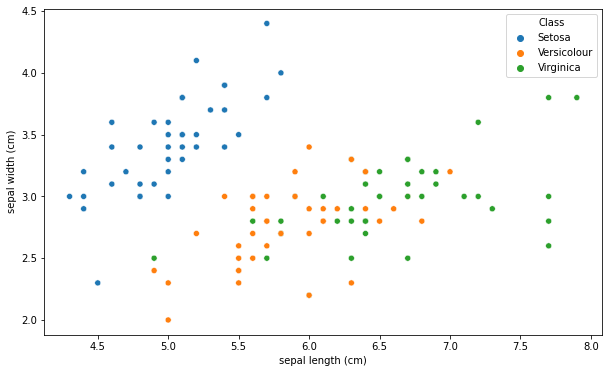

In [28]:
#                 훈련 데이터를 가지고 와서 0번과 1번 데이터의 관계를 본다.
# 파란색으로 되어 있는 것은 구분이 잘 되어 있고, 오랜지 색과 초록색은 섞여서 관계가 없어보임.
# 파란색은 관계가 높다고 함.
fig = sns.scatterplot(data=X_train, x=X_train.iloc[:,0], y=X_train.iloc[:,1], hue=y_train)
fig.figure.set_size_inches(10,6) # 화면 크기 설정

### Standard Scaling


- 표준화 방식으로 평균이 0, 분산이 1인 정규분포로 스케일링 한다.
- 최소값과 최대값의 크기를 제한하지 않아 이상치에 매우 민감하므로 이상치를 미리 확인 및 정제한 후 사용하는 것이 좋다.
- 회귀보다는 분류분석에서 유용한다.   

In [29]:
StdScaler = StandardScaler() 

# 인공지능 할 때에는 데이터 양이 중요하다.

# Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train) # fit()은 학습을 시키는 메소드이다.
X_train_sc=StdScaler.transform(X_train) # transform() 실제로 학습시킨 것을 적용하는 메소드이다.

#Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test) # 데이터 스케일링의 값을 fit(X_trian)에 포함을 시키면 안됨 -> 정확성을 위해서

print("\t\t(min, max)(mean, std)")
print("Train_scaled (%.2f, %.2f)(%.2f, %.2f)" %(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled (%.2f, %.2f)(%.2f, %.2f)" %(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

		(min, max)(mean, std)
Train_scaled (-2.37, 3.03)(-0.00, 1.00)
Test_scaled (-1.92, 2.58)(0.06, 0.97)


In [30]:
print(X_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
46                 5.1               3.8                1.6               0.2
63                 6.1               2.9                4.7               1.4
120                6.9               3.2                5.7               2.3
8                  4.4               2.9                1.4               0.2
101                5.8               2.7                5.1               1.9


In [32]:
xt = pd.DataFrame(X_train_sc.T)

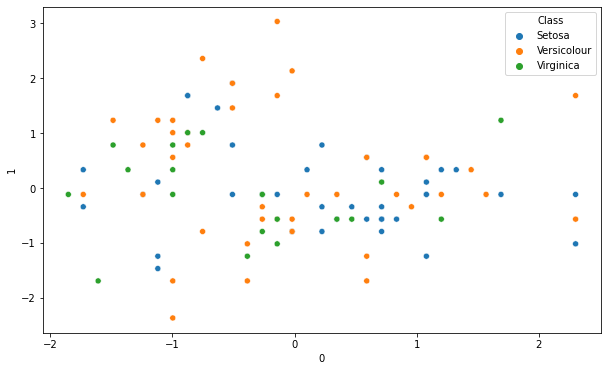

In [33]:
fig = sns.scatterplot(data=xt, x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

###Min-Max Scaler
- 모든 피처들이 0과 1 사이의 값으로 스케일링하는 방식이며 최소값 0, 최대값이 1이 된다.
- 데이터가 2차원인 경우, 모든 데이터는 x, y 축의 0과 1 사이에 존재한다.
- 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포하게 때문에 데이터 그대로 스케일링 방법으로 적절하지 않다.(즉 이상치에 취약하다)  
- 그러므로 이상치를 미리 정제한 후 수행하는 것이 좋다.
- 분류보다 회식에 유용하다.


In [34]:
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.45, 0.26)
Test_scaled (0.04, 0.96) (0.46, 0.26)


[0.22222222 0.75       0.10169492 0.04166667 0.5        0.375
 0.62711864 0.54166667 0.72222222 0.5        0.79661017 0.91666667
 0.02777778 0.375      0.06779661 0.04166667 0.41666667 0.29166667
 0.69491525 0.75       0.41666667 0.29166667 0.52542373 0.375
 0.94444444 0.41666667 0.86440678 0.91666667 0.38888889 0.20833333
 0.6779661  0.79166667 0.30555556 0.58333333 0.08474576 0.125
 0.58333333 0.29166667 0.72881356 0.75       0.58333333 0.375
 0.55932203 0.5        0.58333333 0.5        0.72881356 0.91666667
 0.66666667 0.41666667 0.6779661  0.66666667 0.27777778 0.70833333
 0.08474576 0.04166667 0.38888889 0.41666667 0.54237288 0.45833333
 0.55555556 0.33333333 0.69491525 0.58333333 0.13888889 0.41666667
 0.06779661 0.         0.58333333 0.33333333 0.77966102 0.875
 0.66666667 0.41666667 0.71186441 0.91666667 0.02777778 0.5
 0.05084746 0.04166667 0.36111111 0.20833333 0.49152542 0.41666667
 0.08333333 0.45833333 0.08474576 0.04166667 0.66666667 0.20833333
 0.81355932 0.70833333 0.16

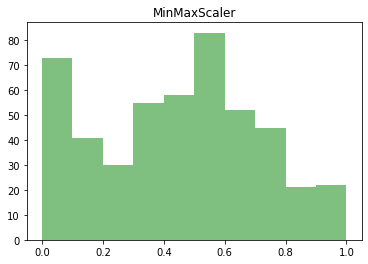

In [35]:
X_train_sc_flat = X_train_sc.flatten()
print(X_train_sc_flat)
plt.hist(X_train_sc_flat,  color='green', alpha=0.5)
plt.title('MinMaxScaler')
plt.show()

In [37]:
xt = pd.DataFrame(X_train_sc.T)

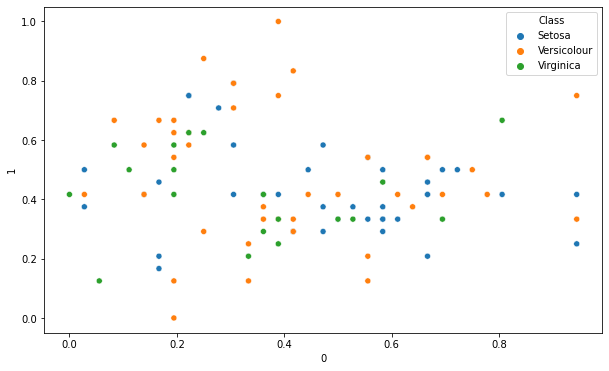

In [38]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### Max  Abs Sxaler
- 모든 피처들을 절대값이 0과 1 사이가 되도록 스케일링합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxSxaler와 같습니다.  
- 이상치에 민감하여, 분류보다는 회귀분석에서 유용하다.  

In [39]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MaScaler.transform(X_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.61, 0.24)
Test_scaled (0.08, 0.96) (0.62, 0.23)


In [41]:
xt = pd.DataFrame(X_train_sc.T)

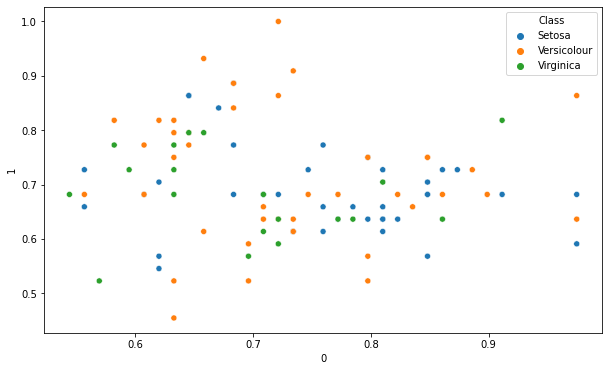

In [42]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### Robust Scaler
- StandardScaler는 평균과 분산을 사용했지만 RobustScaler는 평균과 분산 대신 중앙값(Median)과 사분위(quartile) 값을 활용하는 방식으로, 중앙값을 0으로 설정하고 IQR을 사용하여 이상치의 영향을 최소화한다.






In [43]:
from sklearn.preprocessing import RobustScaler




RuScaler = RobustScaler()


# Train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)


# Test 데이터의 스케일링
X_test_sc = RuScaler.transform(X_test)




print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))


		(min, max) (mean, std)
Train_scaled (-2.00, 2.80) (-0.00, 0.66)
Test_scaled (-1.60, 2.40) (0.04, 0.63)


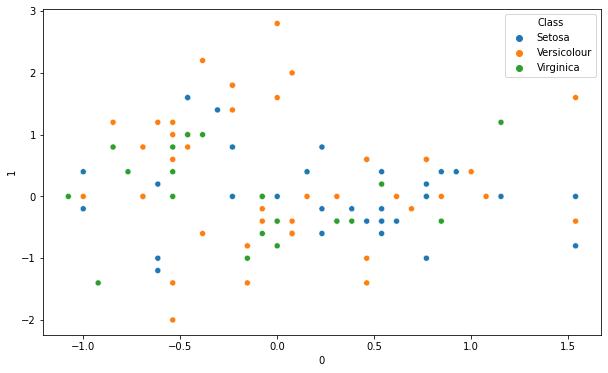

In [47]:
xt = pd.DataFrame(X_train_sc.T)
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### RobustSclaer 원본 스케일로 변경   

In [51]:
print(X_train.head(3))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
46                 5.1               3.8                1.6               0.2
63                 6.1               2.9                4.7               1.4
120                6.9               3.2                5.7               2.3


In [52]:
X_Original = RuScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_Original).head(3)

,0,1,2,3
0,6.710478,3.289579,5.109592,1.345723
1,6.650058,3.173718,6.234879,1.551592
2,6.617266,3.163615,6.304645,1.652795


###Normalizer
- 앞의 4가지 방법은 각 피처(feature)의 통계치를 이용한다. 즉, 열(columns)를 대상으로 한다.
- 그러나 Normalizer 의 경우 각 행(row)마다 정규화가 진행한다.
- 이는 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만들어 준다.
- 이렇게 하면 좀 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수 있다.






In [48]:
from sklearn.preprocessing import Normalizer


NoScaler = Normalizer()




# Train 데이터의 fitting과 스케일링
NoScaler.fit(X_train)
X_train_sc = NoScaler.transform(X_train)


# Test 데이터의 스케일링
X_test_sc = NoScaler.transform(X_test)




print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))


		(min, max) (mean, std)
Train_scaled (0.01, 0.86) (0.44, 0.24)
Test_scaled (0.03, 0.83) (0.44, 0.24)


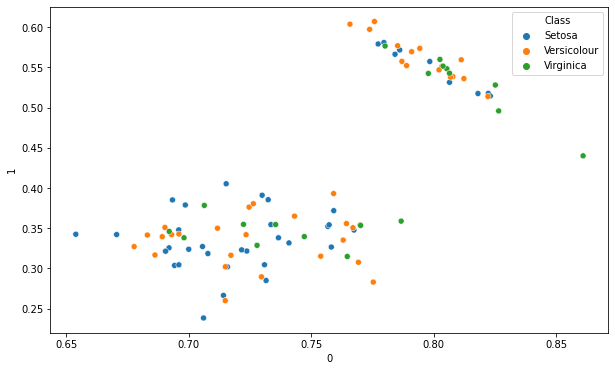

In [49]:
xt = pd.DataFrame(X_train_sc.T)
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

In [15]:
# 데이터를 저장할 때 아래처럼 분산해서 저장한다. 숫자의 의미는 없음.
print(X_train_sc)

[[ 1.25895027e+00  9.28977352e-02  7.48817458e-01  1.43193552e+00]
 [-4.20983371e-01  2.64758545e+00 -1.34881631e+00 -1.30590781e+00]
 [-1.02095967e+00  7.89630750e-01 -1.29212350e+00 -1.30590781e+00]
 [-1.14095493e+00  9.28977352e-02 -1.29212350e+00 -1.30590781e+00]
 [ 6.58973971e-01 -3.71590941e-01  2.95275023e-01  1.28200600e-01]
 [ 7.78969231e-01 -1.39346603e-01  8.05510263e-01  1.04081504e+00]
 [ 1.61893605e+00 -1.39346603e-01  1.14566709e+00  5.19321076e-01]
 [ 2.21891235e+00 -6.03835279e-01  1.65590233e+00  1.04081504e+00]
 [-1.74093123e+00 -3.71590941e-01 -1.34881631e+00 -1.30590781e+00]
 [-1.80992851e-01 -6.03835279e-01  4.08660632e-01  1.28200600e-01]
 [ 7.78969231e-01 -1.39346603e-01  9.75588676e-01  7.80068060e-01]
 [ 1.37894553e+00  3.25142073e-01  5.22046241e-01  2.58574092e-01]
 [ 2.09891709e+00 -1.39346603e-01  1.59920952e+00  1.17118854e+00]
 [ 1.78992930e-01  7.89630750e-01  4.08660632e-01  5.19321076e-01]
 [-1.62093597e+00 -1.76505697e+00 -1.40550911e+00 -1.17553432e

### Standard Scaling  

In [16]:




StdScaler = StandardScaler()